In [8]:
datapath = '/Users/jkgerdts/Mirror/LAB/data/2021 03-01 L929 binding/Log.csv'
import pandas as pd
df = pd.read_csv(datapath)
df
key_A = {'green':'PSGL1','red':'parental','blue':'tetherP'}
key_B = {'green':'beta1','red':'parental','blue':'tetherP'}
key_by_col = [key_A,key_A,key_A,key_B,key_B,key_B]
receptor_priority = {'parental':1,'tetherP':2,'beta1':3,'PSGL1':4}
df['col']=[int(x[0]) for x in df['fld'].values]
df['receptor']=[key_by_col[col-1][clr] for col,clr in zip(df['col'],df['color'])]
df['priority']=[receptor_priority[x] for x in df['receptor']]
df

,fld,color,count,col,receptor,priority
0,1_1,green,34,1,PSGL1,4
1,1_2,green,35,1,PSGL1,4
2,1_3,green,29,1,PSGL1,4
3,1_4,green,39,1,PSGL1,4
4,1_5,green,48,1,PSGL1,4
...,...,...,...,...,...,...
88,6_1,blue,12,6,tetherP,2
89,6_2,blue,11,6,tetherP,2
90,6_3,blue,11,6,tetherP,2
91,6_4,blue,14,6,tetherP,2


In [25]:
# all the grouping is done in one step:
# "priority" is tracked through just to be able to sort
output = df.groupby(['receptor','col']).agg({'count':'mean','priority':'first'}).groupby('receptor').agg({'count':['mean','sem'],'priority':'first'}).sort_values(('priority','first'))

In [26]:
output

count           priority
               mean       sem    first
receptor                              
parental   3.138889  0.366001        1
tetherP   14.655556  2.166302        2
beta1     27.600000  1.404754        3
PSGL1     28.711111  4.811458        4

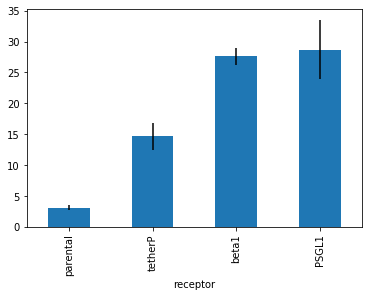

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
output['count']['mean'].plot.bar(yerr=output['count']['sem'])
plt.savefig('/Users/jkgerdts/Mirror/LAB/data/2021 03-01 L929 binding/bargraph.pdf')